In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_excel('Data_collection_for_concrete_mixing.xlsx', header=[0,1,2])

data.shape


(1006, 10)

In [3]:
data.head()


S. No                  Authors Input Variables           \
  Unnamed: 0_level_1       Unnamed: 1_level_1          Binder Pozzolan   
  Unnamed: 0_level_2       Unnamed: 1_level_2         (kg/m3)  (kg/m3)   
0                  1  Tikalsky., et al., 2004           420.0      0.0   
1                  2                      NaN           411.0      0.0   
2                  3                      NaN           149.0    302.0   
3                  4                      NaN           311.0      0.0   
4                  5                      NaN            57.0    268.0   

                                                                           \
  Fine aggregate   Water Foaming agent Measured Density Period of Testing   
         (kg/m3) (kg/m3)       (kg/m3)          (kg/m3)            (Days)   
0            0.0   168.0          39.4            629.0                28   
1            0.0   186.0          38.5            631.0                28   
2            0.0   190.0          35.8            678.0                28   
3            0.0   141.0          44.3            497.0                28   
4          885.0   163.0          20.0           1396.0                28   

      Output Variables  
  Compressive Strength  
                 (MPa)  
0                 1.77  
1                 2.07  
2                 1.09  
3                 0.71  
4                 0.25

In [4]:
#start preprocessing

data.columns

MultiIndex([(           'S. No',   'Unnamed: 0_level_1', 'Unnamed: 0_level_2'),
            (         'Authors',   'Unnamed: 1_level_1', 'Unnamed: 1_level_2'),
            ( 'Input Variables',               'Binder',            '(kg/m3)'),
            ( 'Input Variables',             'Pozzolan',            '(kg/m3)'),
            ( 'Input Variables',       'Fine aggregate',            '(kg/m3)'),
            ( 'Input Variables',                'Water',            '(kg/m3)'),
            ( 'Input Variables',        'Foaming agent',            '(kg/m3)'),
            ( 'Input Variables',     'Measured Density',            '(kg/m3)'),
            ( 'Input Variables',    'Period of Testing',             '(Days)'),
            ('Output Variables', 'Compressive Strength',              '(MPa)')],
           )

In [5]:
data.columns = ["S.no", "Authors", "binder(kg/m3)", "pozzolan(kg/m3)", "fine_aggregate(kg/m3)",
                "water(kg/m3)", "foaming_agent(kg/m3)", "measured_density(kg/m3)",
                "period_of_testing(Days)", "compressive_strength(MPa)"]

data.columns 

Index(['S.no', 'Authors', 'binder(kg/m3)', 'pozzolan(kg/m3)',
       'fine_aggregate(kg/m3)', 'water(kg/m3)', 'foaming_agent(kg/m3)',
       'measured_density(kg/m3)', 'period_of_testing(Days)',
       'compressive_strength(MPa)'],
      dtype='object')

In [6]:
data.head()

,S.no,Authors,binder(kg/m3),pozzolan(kg/m3),fine_aggregate(kg/m3),water(kg/m3),foaming_agent(kg/m3),measured_density(kg/m3),period_of_testing(Days),compressive_strength(MPa)
0,1,"Tikalsky., et al., 2004",420.0,0.0,0.0,168.0,39.4,629.0,28,1.77
1,2,NaN,411.0,0.0,0.0,186.0,38.5,631.0,28,2.07
2,3,NaN,149.0,302.0,0.0,190.0,35.8,678.0,28,1.09
3,4,NaN,311.0,0.0,0.0,141.0,44.3,497.0,28,0.71
4,5,NaN,57.0,268.0,885.0,163.0,20.0,1396.0,28,0.25


In [7]:
data.shape

(1006, 10)

In [8]:
data = data.drop(columns=["S.no", "Authors"])
data.head()

,binder(kg/m3),pozzolan(kg/m3),fine_aggregate(kg/m3),water(kg/m3),foaming_agent(kg/m3),measured_density(kg/m3),period_of_testing(Days),compressive_strength(MPa)
0,420.0,0.0,0.0,168.0,39.4,629.0,28,1.77
1,411.0,0.0,0.0,186.0,38.5,631.0,28,2.07
2,149.0,302.0,0.0,190.0,35.8,678.0,28,1.09
3,311.0,0.0,0.0,141.0,44.3,497.0,28,0.71
4,57.0,268.0,885.0,163.0,20.0,1396.0,28,0.25


In [9]:
data.isnull().sum()

binder(kg/m3)                  0
pozzolan(kg/m3)              406
fine_aggregate(kg/m3)          0
water(kg/m3)                   0
foaming_agent(kg/m3)           0
measured_density(kg/m3)        0
period_of_testing(Days)        0
compressive_strength(MPa)      0
dtype: int64

In [10]:
data['pozzolan(kg/m3)'] = data['pozzolan(kg/m3)'].fillna(0)
data.isnull().sum()

# filled missing values for pozzolan with 0 because only this column had missing values, and it is possible that some concrete mixes do not use pozzolan.

binder(kg/m3)                0
pozzolan(kg/m3)              0
fine_aggregate(kg/m3)        0
water(kg/m3)                 0
foaming_agent(kg/m3)         0
measured_density(kg/m3)      0
period_of_testing(Days)      0
compressive_strength(MPa)    0
dtype: int64

In [11]:
data = data.apply(pd.to_numeric, errors='coerce')

In [12]:
data = data.reset_index(drop=True)
data.head()

,binder(kg/m3),pozzolan(kg/m3),fine_aggregate(kg/m3),water(kg/m3),foaming_agent(kg/m3),measured_density(kg/m3),period_of_testing(Days),compressive_strength(MPa)
0,420.0,0.0,0.0,168.0,39.4,629.0,28,1.77
1,411.0,0.0,0.0,186.0,38.5,631.0,28,2.07
2,149.0,302.0,0.0,190.0,35.8,678.0,28,1.09
3,311.0,0.0,0.0,141.0,44.3,497.0,28,0.71
4,57.0,268.0,885.0,163.0,20.0,1396.0,28,0.25


In [13]:
data.shape

(1006, 8)

In [14]:
# writing the data in the csv
data.to_csv('preprocessed_concrete_mixing_entries.csv', index=False)

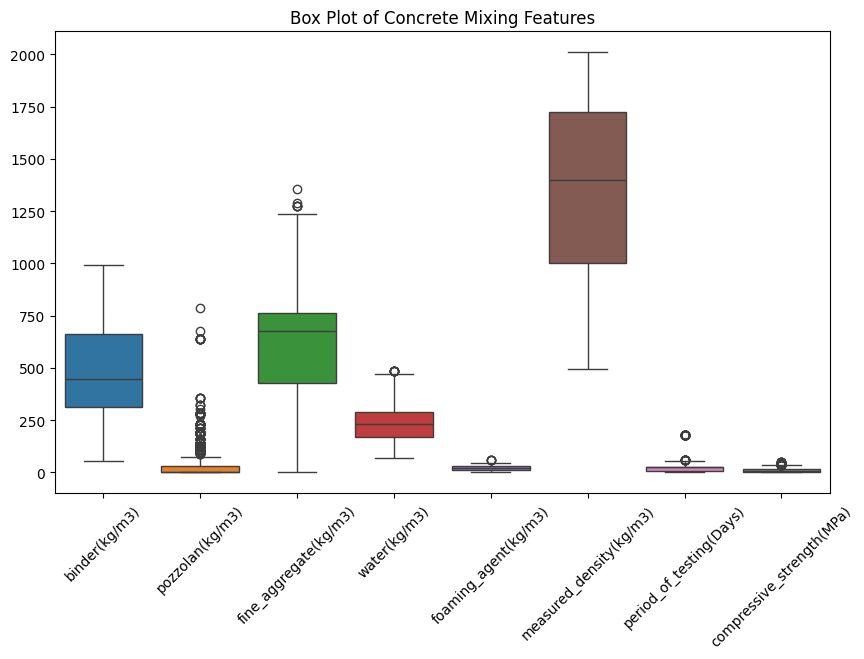

In [18]:
#box plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=data)
plt.title('Box Plot of Concrete Mixing Features')
plt.xticks(rotation=45)
plt.show()

In [21]:
#skewness, variance and kurtosis
skewness = data.skew()
variance = data.var()
kurtosis = data.kurtosis()
print("Skewness:\n", skewness)
print("\nVariance:\n", variance)
print("\nKurtosis:\n", kurtosis)

relative_range = (data.max() - data.min()) / data.mean()
print("\nRelative Range:\n", relative_range)

Skewness:
 binder(kg/m3)                0.342727
pozzolan(kg/m3)              3.921187
fine_aggregate(kg/m3)       -0.441710
water(kg/m3)                 0.318624
foaming_agent(kg/m3)         0.049449
measured_density(kg/m3)     -0.410960
period_of_testing(Days)      3.584768
compressive_strength(MPa)    1.342613
dtype: float64

Variance:
 binder(kg/m3)                 44626.207107
pozzolan(kg/m3)                8916.202432
fine_aggregate(kg/m3)         69045.070295
water(kg/m3)                   7171.722454
foaming_agent(kg/m3)            150.619457
measured_density(kg/m3)      183538.983537
period_of_testing(Days)        1079.530586
compressive_strength(MPa)       136.946881
dtype: float64

Kurtosis:
 binder(kg/m3)                -0.884381
pozzolan(kg/m3)              19.713293
fine_aggregate(kg/m3)         0.104405
water(kg/m3)                  0.185845
foaming_agent(kg/m3)         -0.521640
measured_density(kg/m3)      -0.948665
period_of_testing(Days)      13.964962
compressive_st

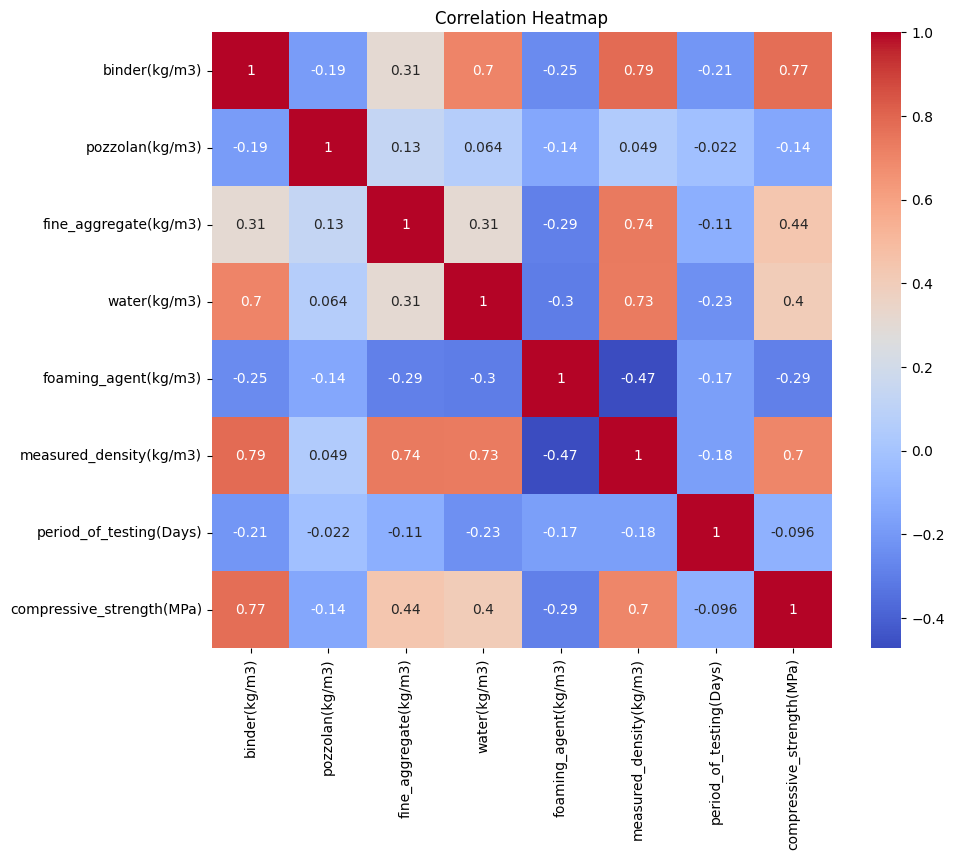

In [22]:
#correlation heatmap

plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

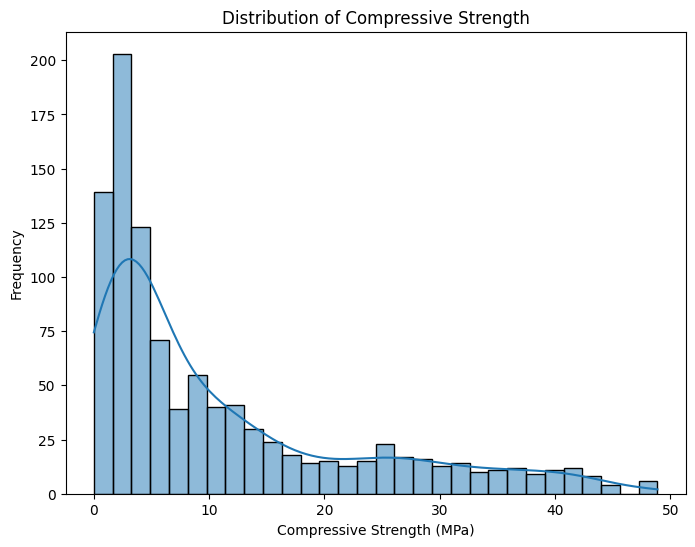

In [23]:
#distribution of target variable

plt.figure(figsize=(8,6))
sns.histplot(data['compressive_strength(MPa)'], bins=30, kde=True)
plt.title('Distribution of Compressive Strength')
plt.xlabel('Compressive Strength (MPa)')
plt.ylabel('Frequency')
plt.show()

In [25]:
#pearson correlation coefficients
correlation_with_target = data.corr()['compressive_strength(MPa)'].sort_values(ascending=False)
print("Pearson Correlation Coefficients with Compressive Strength:\n", correlation_with_target)

Pearson Correlation Coefficients with Compressive Strength:
 compressive_strength(MPa)    1.000000
binder(kg/m3)                0.774796
measured_density(kg/m3)      0.698801
fine_aggregate(kg/m3)        0.438349
water(kg/m3)                 0.403525
period_of_testing(Days)     -0.095678
pozzolan(kg/m3)             -0.140309
foaming_agent(kg/m3)        -0.290730
Name: compressive_strength(MPa), dtype: float64
